# Sequence capacity
This network is to explore a formula to calculate sequence capacity

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


%matplotlib inline

In [2]:
def calculate_network_capacity(minicolumns, sequence_length, overlap):
    """
    :param minicolumns: The number of minicolumns in the network
    :param sequence_length: How long is the sequence
    :param overlap: The overlap
    :return: capacity
    """
    if minicolumns < 3:
        raise ValueError('To small')
    if sequence_length >= minicolumns:
        raise ValueError('Sequences too big')
    if overlap >= sequence_length:
        raise ValueError('Too big of an overlap')

    position = 0
    capacity = 0

    # As long as position is inside the minicolumns
    while(position + sequence_length <= minicolumns):
        # Lay a sequence
        for i in range(sequence_length):
            position += 1

        # Substract overlap
        position -= overlap
        capacity += 1  # Every time you put a sequence

    return capacity


Let's make a simple example to see that the formula works

In [21]:
minicolumns = 10
sequence_length = 3
overlap = 1

formula = int((minicolumns - sequence_length)/(sequence_length - overlap)) + 1
capacity = calculate_network_capacity(minicolumns, sequence_length, overlap)
print('capacity', capacity)
print('formula', formula)

capacity 4
formula 4


We see that they agree, now let's make the comparison systematic by taking random numbers

In [4]:
ceiling = 1000
size = 5000
minicolumns_random_set = np.random.randint(low=5, high=ceiling, size=size)
verbose = False

for minicolumns in minicolumns_random_set:
    sequence_length = np.random.randint(low=2, high=minicolumns - 1)
    overlap = np.random.randint(low=0, high=sequence_length - 1)
    capacity = calculate_network_capacity(minicolumns, sequence_length, overlap)
    formula = int((minicolumns - sequence_length)/(sequence_length - overlap)) + 1
    
    if capacity != formula:
        print('Error for')
        print('capacity', capacity)
        print('formula', formula)
        print('---------------')
    
    if verbose:
        print('minicolumns', minicolumns)
        print('sequence_length', sequence_length)
        print('overlap', overlap)
        print('capacity', capacity)
        print('formula', formula)
        print('---------------')
    

print('If this is the only printed thing, then there was no error')

If this is the only printed thing, then there was no error


#### Relationships

In [5]:
def calculate_capacity_array(minicolumn_max, overlap):
    minicolumns_min = 5
    minicolumns_set = np.arange(minicolumns_min, minicolumn_max, 1)
    capacity_array = np.ones((minicolumn_max, minicolumn_max)) * -1

    for minicolumns_index, minicolumns in enumerate(minicolumns_set):
        for sequence_length_index, sequence_length in enumerate(range(overlap + 1, minicolumns)):
            capacity = calculate_network_capacity(minicolumns, sequence_length, overlap)
            capacity_array[sequence_length, minicolumns] = capacity
            
    return capacity_array

def plot_capacity_array(capacity_array):
    with plt.rc_context({'font.size': 22}):
        cmap = matplotlib.cm.YlOrRd
        cmap.set_under('white')

        fig = plt.figure(figsize=(16, 12))
        ax = fig.add_subplot(111)
        im = ax.imshow(capacity_array, interpolation='none', origin='lower', cmap=cmap, vmin=0)
        
        ax.set_xticks(np.arange(-0.5, capacity_array.shape[0], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, capacity_array.shape[0], 1), minor=True)
        
        ax.set_xticks(np.arange(0, capacity_array.shape[0], 10), minor=False)
        ax.set_yticks(np.arange(0, capacity_array.shape[0], 10), minor=False)

        # Gridlines based on minor ticks
        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
        ax.grid(which='major', color='k', linestyle='-', linewidth=2)

        ax.set_xlabel('minicolumns')
        ax.set_ylabel('sequence length')

        divider = make_axes_locatable(ax)
        cax1 = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, ax=ax, cax=cax1);

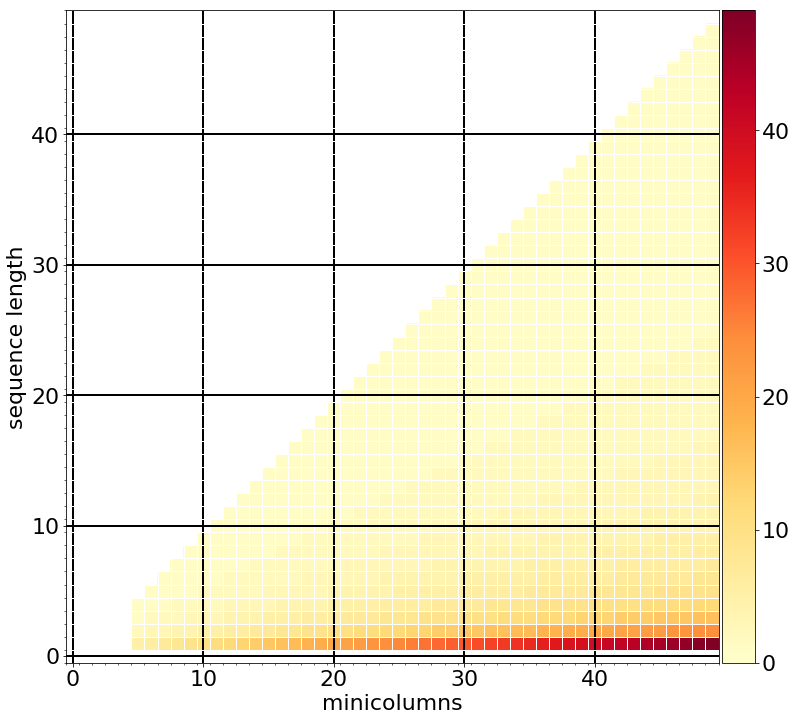

In [6]:
minicolumn_max = 50
overlap = 0
capacity_array = calculate_capacity_array(minicolumn_max, overlap)
plot_capacity_array(capacity_array)

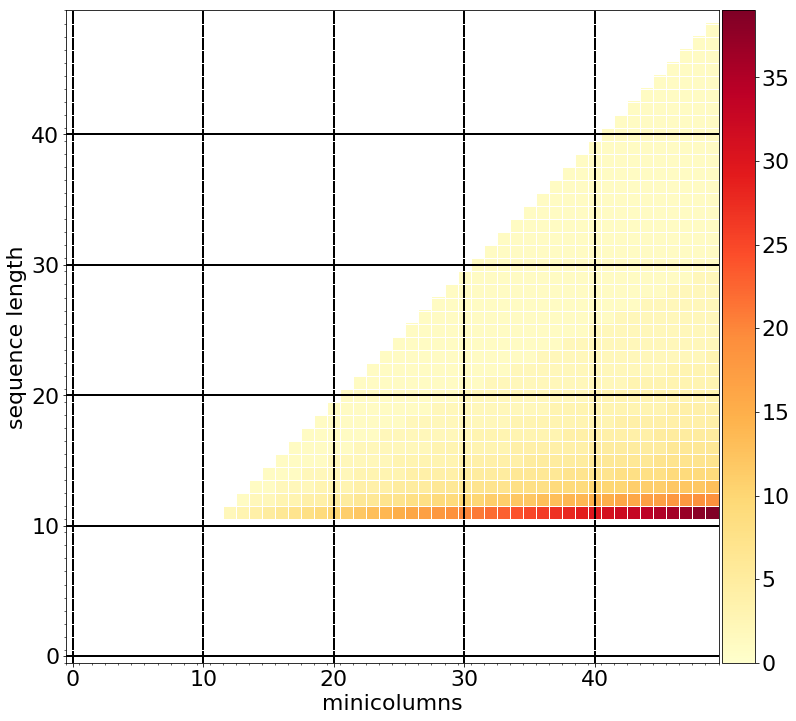

In [7]:
minicolumn_max = 50
overlap = 10
capacity_array = calculate_capacity_array(minicolumn_max, overlap)
plot_capacity_array(capacity_array)

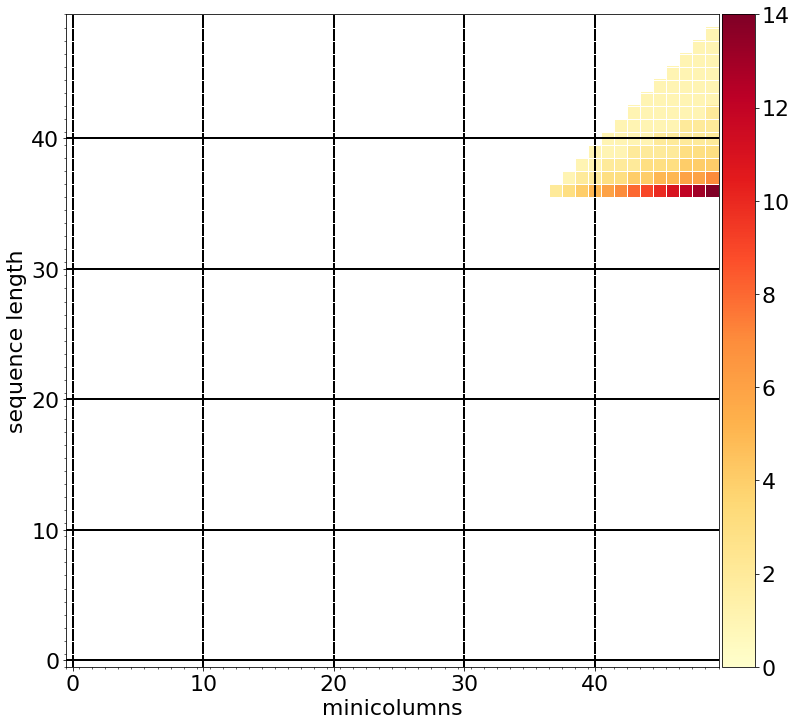

In [8]:
minicolumn_max = 50
overlap = 35
capacity_array = calculate_capacity_array(minicolumn_max, overlap)
plot_capacity_array(capacity_array)

Now let's see how for a particular configuration of minicolumns and sequence length the capacity grows with 

In [15]:
minicolumns = 100
sequence_length = 30
overlap_set = np.arange(1, 29, 1)
capacity = np.zeros_like(overlap_set)

In [16]:
for index, overlap in enumerate(overlap_set):
    capacity[index] = calculate_network_capacity(minicolumns, sequence_length, overlap)

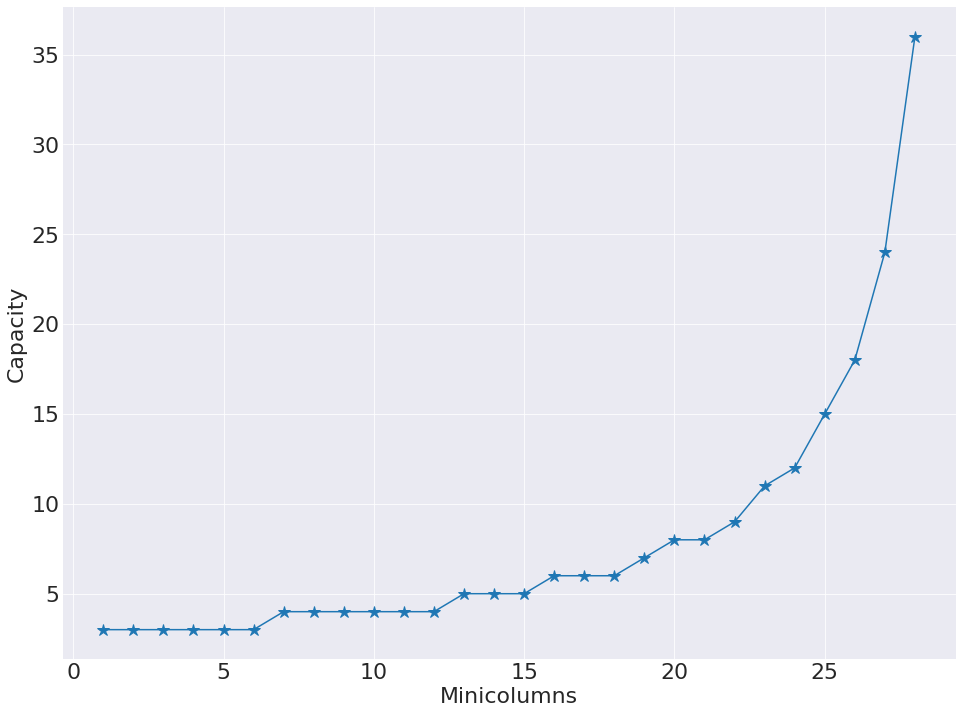

In [19]:
with plt.style.context('seaborn-darkgrid'):
    plt.rc_context({'font.size': 22})
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111)
    ax.plot(overlap_set, capacity, '-*', markersize=12)
    
    ax.set_xlabel('Minicolumns')
    ax.set_ylabel('Capacity');